Get pair-wise correlations between all human condensability scores in 1kb resolution

In [1]:
# python modules
import sys
import copy
import re
import random
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

agent_fullname = {'sp':'Spermine(4+)',
                  'spd':'Spermidine(3+)',
                  'CoH':'Cobalt Hexammine(3+)',
                  'PEG':'PEG 8000',
                  'HP1a':'HP1$\\alpha$',
                  'HP1bSUV':'HP1$\\beta$+tSUV',
                  'LKH':'Linker histone1',
                  'Ki67':'Ki67',
                  'FUS':'FUS',
                  'Mg':'Magnesium',
                  'Ca':'Calcium'}

agent_charge = {'sp':'4+',
                'spd':'3+',
                'CoH':'3+',
                'PEG':'',
                'Ca':'2+',
                'Mg':'2+',
                'HP1a':'',
                'HP1bSUV':'',
                'LKH':'',
                'Ki67':'',
                'FUS':''}

In [5]:
### load gtab files
gtab_path = "/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/"

dinfo_dkey = {'E14_NCP_sp_1rep_10kb_score.gtab.gz':
              {'E14_NCP_sp_8_1rep':(1, 'E14', 'NCP', 'sp', 8)},
              'E14_NCPre1_sp_1rep_10kb_score.gtab.gz':
              {'E14_NCPre1_sp_8_1rep':(1, 'E14', 'NCPre1', 'sp', 8)},
              'E14_NCPre2_sp_1rep_10kb_score.gtab.gz':
              {'E14_NCPre2_sp_8_1rep':(1, 'E14', 'NCPre2', 'sp', 8)},
              'E14_NCPre3_sp_1rep_10kb_score.gtab.gz':
              {'E14_NCPre3_sp_8_1rep':(1, 'E14', 'NCPre3', 'sp', 8)},
              'E14_NCPre4_sp_1rep_10kb_score.gtab.gz':
              {'E14_NCPre4_sp_8_1rep':(1, 'E14', 'NCPre4', 'sp', 8)}
              }


dkey_ID_score = load_file.read_gtab_batch (dinfo_dkey,
                                           data_path=gtab_path)

dkey_list = [(1, 'E14', 'NCP', 'sp', 8),
             (1, 'E14', 'NCPre1', 'sp', 8),
             (1, 'E14', 'NCPre2', 'sp', 8),
             (1, 'E14', 'NCPre3', 'sp', 8),
             (1, 'E14', 'NCPre4', 'sp', 8)]

loading E14_NCP_sp_1rep_10kb_score.gtab.gz


loading E14_NCPre4_sp_1rep_10kb_score.gtab.gz


loading E14_NCPre2_sp_1rep_10kb_score.gtab.gz


loading E14_NCPre3_sp_1rep_10kb_score.gtab.gz


loading E14_NCPre1_sp_1rep_10kb_score.gtab.gz


Done


In [6]:
### get common IDs
ID_list = set([])
for i in range(len(dkey_list)):
    dkey = dkey_list[i]
    if i == 0:
        ID_list |= set(dkey_ID_score[dkey].keys())
        continue
    ID_list &= set(dkey_ID_score[dkey].keys())
ID_list = sorted(list(ID_list))
    

In [7]:
### reorganize data and make labels
dkey_label = {}
dkey_data = {}
for dkey in dkey_list:
    rep, cell, sample, agent, tnum = dkey
    label = '%s \n%s' % (cell, sample)
    dkey_label[dkey] = label
    data = [dkey_ID_score[dkey][ID] for ID in ID_list]
    dkey_data[dkey] = data


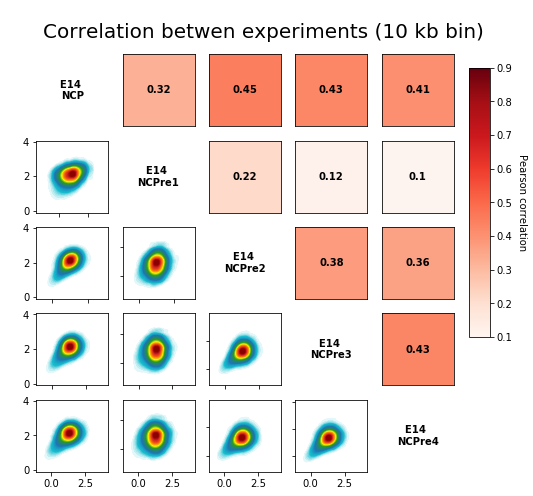

In [8]:
# plot correlation matrix between experiment
graphics.plot_corr_matrix(dkey_data,
                          dkey_label,
                          ids = dkey_list,
                          corr='Pearson',
                          scatter_style='density',
                          fig_scale=1,
                          cbar=True,
                          title = "Correlation betwen experiments (10 kb bin)",
                          note='E14_10kb',
                          save=True,
                          save_path='data/')
